# Project 3: Predicting Default of Credit Card


In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as smf
from scipy.stats import chi2_contingency

/Users/sze/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Introduction

In recent years, the credit card issuers in China faced  credit card debt crisis and the delinquency is expected to peak in the third quarter.  In order to increase market share, card-issuing banks  over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash– card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders.

In a well-developed financial system, crisis management is on the downstream and risk prediction is on the upstream. Credit risk here means the probability of a delay in the repayment of the credit granted . The major purpose of risk prediction is to use financial information, such as business financial statement, customer transaction and repayment records, etc., to predict business performance or individual customers’ credit risk and to reduce the damage and uncertainty.

Many statistical methods, including discriminant analysis, logistic regression, Bayes classifier have been used to develop models of risk prediction. More advanced methods, deep autoencoder, variationa autoencoder can even learn new features which have not been explored but are crucial in accurately improving the accuracy of prediction. 


Logistic regression can be considered a special case of linear regression models. However, the binary response variable violates normality assumptions of general regression models. A logistic regression model specifies that an appropriate function of the fitted probability of the event is a linear function of the observed values of the available explanatory variables. The major advantage of this approach is that it can produce a simple probabilistic formula of classification. 


## Data


   In this project, we will explore the dataset from Taiwan, which contains information on default payments,  credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. Totally, there are 30000 customers' records with 23 features and 1 response (default.payment.next.month)

In [2]:
credit=pd.read_csv('UCI_Credit_Card.csv',index_col=0)
credit.shape

(30000, 24)

In [3]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


There are 23 features, which include all types of data: categorical , discrete and continuous numerical variables.  



- LIMIT_BAL(numerical): Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX(categorical): Gender (1=male, 2=female)
- EDUCATION(categorical): (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE(categorical): Marital status (1=married, 2=single, 3=others)
- AGE(numerical): Age in years
- PAY_0, Pay2-Pay6(numerical) : Repayment status in September, Aug,July, June, May, April, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

- BILL_AMT1 to BILL_AMT6(numerical): Amount of bill statement in from  September to April,  2005 (NT dollar)

- PAY_AMT1 to PAY_AMT6 (numerical) : Amount of previous payment  in from September to April, 2005 (NT dollar)

- default.payment.next.month: Default payment (1=yes, 0=no)


#  Questions 


## Q1. Data Munging 
### Import response variable 

In [28]:
Data=pd.DataFrame()
Data['Y']=credit['default.payment.next.month']
Data.head()

,Y
ID,
1,1
2,1
3,0
4,0
5,0


### Standardize numerical variables .
For example "BILL_AMT4" is continuous numerical, we want to make this column to take values between 0 and 1 which is called "standardization of data".  We can do this by  

In [5]:
standard_amt4=(credit["BILL_AMT4"]-credit["BILL_AMT4"].min())/(credit["BILL_AMT4"].max()-credit["BILL_AMT4"].min())


We will run regressions with multiple features, it is better to let all features take values in similar scales, especially if there are many features. 

**Please standardize all  numerical values and save it in DataFrame, Data**

In [6]:

# Data['standard_LIMIT_BAL']=(credit["LIMIT_BAL"]-credit["LIMIT_BAL"].min())/(credit["LIMIT_BAL"].max()-credit["LIMIT_BAL"].min())
# colname = [col for col in credit.columns ]
# for i in range(len(colname)):
#     Data['standard_'+colname[i]]=(credit[colname[i]]-credit[colname[i]].min())/(credit[colname[i]].max()-credit[colname[i]].min())
# Data.head()

# shouldn't standardize education, marriage, sex because they are not numerical 

,Y,standard_LIMIT_BAL,standard_SEX,standard_EDUCATION,standard_MARRIAGE,standard_AGE,standard_PAY_0,standard_PAY_2,standard_PAY_3,standard_PAY_4,...,standard_BILL_AMT4,standard_BILL_AMT5,standard_BILL_AMT6,standard_PAY_AMT1,standard_PAY_AMT2,standard_PAY_AMT3,standard_PAY_AMT4,standard_PAY_AMT5,standard_PAY_AMT6,standard_default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
2,1,0.111111,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
3,0,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
4,0,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
5,0,0.040404,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0


In [26]:
numerlist=['AGE','LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [29]:
Data[numerlist]=(credit[numerlist]-credit[numerlist].min())/(credit[numerlist].max()-credit[numerlist].min())
Data.head()

,Y,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,
1,1,0.051724,0.010101,0.4,0.4,0.1,0.1,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
2,1,0.086207,0.111111,0.1,0.4,0.2,0.2,0.2,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
3,0,0.224138,0.080808,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
4,0,0.275862,0.040404,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
5,0,0.620690,0.040404,0.1,0.2,0.1,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


### Make dummy variables for categorical variables. 
We cannot standardize the categorical variables , because the values of categorical data do not have maximum and minum since they cannot be ranked. Instead we wil use dummy variable (Indicator)

For example 


In [30]:
Data['Sex_dumy']=[1 if sex==1 else 0 for sex in credit['SEX']]

The number of categories of EDUCATION is too many (with more categories, the model is less robust when sample size is small). 
- **Please build a dummy variable for EDUCATION:  1 for graduate school and university and 0 else.**
- **Please build a dummy variable for MARRIAGE:  1 for "married" and 0 else.**

In [40]:
Data['Education_dumy']=[1 if EDUCATION<=2 else 0 for EDUCATION in credit['EDUCATION']]
Data['Marriage_dumy']=[1 if MARRIAGE==1 else 0 for MARRIAGE in credit['MARRIAGE']]
# remove the original categorical variables
# del Data['standard_default.payment.next.month']
# del Data['standard_SEX']
# del Data['standard_EDUCATION']
# del Data['standard_MARRIAGE']
Data.head()

,Y,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,BILL_AMT2,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Sex_dumy,Education_dumy,Marriage_dumy
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0.051724,0.010101,0.4,0.4,0.1,0.1,0.0,0.149982,0.069164,...,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,0,1,1
2,1,0.086207,0.111111,0.1,0.4,0.2,0.2,0.2,0.148892,0.067858,...,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,0,1,0
3,0,0.224138,0.080808,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,...,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0,1,0
4,0,0.275862,0.040404,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,...,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0,1,1
5,0,0.620690,0.040404,0.1,0.2,0.1,0.2,0.2,0.154144,0.071601,...,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,1,1,1


## Q2. Weighted Sample
Now let use compute totally, how many custermers default and how many did not default. 


In [41]:
print("Out of ", Data.shape[0], " customers, ", Data['Y'].sum(), " cutomers default!")

Out of  30000  customers,  6636  cutomers default!


Hence our sample is unbalanced  with default:default ratio =1:4 (In balanced data,  1 to 0 ratio should be 50:50 roughly.) For unbalanced data, the estimation of logistic regression parameters is difficult. For example ,a trivial model will predict all customers not to default, because the accuracy rate is still high.  An important step before we slice data into train and test, is to over sample defaulted customers or down sample the undefaulted customers so that the ratio between the undefaulted and defaulted is 50:50 roughly. 


First we will get index for undefault customers and sample 6636 cutomers from this index. 

In [42]:
sampled_undefault=pd.DataFrame()
index=Data[Data['Y']==0].index   
# because has less default ppl than undefault, so choose the same number of ppl out of undefault population
sampled_index=np.random.choice(index,6636,replace=False) # try to get different customers without replacement
sampled_undefault=Data.loc[sampled_index,:]
sampled_undefault.head()

,Y,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,BILL_AMT2,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Sex_dumy,Education_dumy,Marriage_dumy
ID,,,,,,,,,,,,,,,,,,,,,
7303,0,0.224138,0.383838,0.0,0.0,0.0,0.1,0.1,0.153279,0.076542,...,0.298477,0.006964,0.000624,0.001724,0.076135,0.007034,0.005675,0,1,1
26337,0,0.206897,0.343434,0.2,0.2,0.2,0.2,0.2,0.415479,0.349431,...,0.400735,0.011448,0.005465,0.007600,0.009188,0.014067,0.008533,0,1,0
3045,0,0.465517,0.424242,0.0,0.0,0.0,0.0,0.0,0.150474,0.115772,...,0.261657,0.059786,0.027867,0.000000,0.075663,0.002068,0.000000,1,1,1
1742,0,0.206897,0.171717,0.1,0.1,0.1,0.1,0.1,0.148481,0.066220,...,0.260979,0.000000,0.004907,0.000000,0.005279,0.000000,0.008788,1,1,0
14071,0,0.137931,0.242424,0.0,0.0,0.1,0.1,0.1,0.147126,0.066220,...,0.278130,0.000000,0.000562,0.008242,0.008536,0.109395,0.005607,0,0,0


Then we take default customers. 

In [43]:
default=pd.DataFrame()
index_1=Data[Data['Y']==1].index
default=Data.loc[index_1,:]
default.head()

,Y,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,BILL_AMT2,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Sex_dumy,Education_dumy,Marriage_dumy
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0.051724,0.010101,0.4,0.4,0.1,0.1,0.0,0.149982,0.069164,...,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,0,1,1
2,1,0.086207,0.111111,0.1,0.4,0.2,0.2,0.2,0.148892,0.067858,...,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,0,1,0
14,1,0.155172,0.060606,0.3,0.4,0.4,0.2,0.2,0.204746,0.130156,...,0.289331,0.003663,0.000000,0.003348,0.004831,0.003517,0.000000,1,1,0
17,1,0.051724,0.010101,0.2,0.2,0.4,0.4,0.4,0.160125,0.083312,...,0.275660,0.003663,0.000000,0.001674,0.000000,0.003868,0.000000,1,1,0
22,1,0.310345,0.111111,0.1,0.1,0.1,0.1,0.1,0.146799,0.066520,...,0.261222,0.000362,0.000188,0.000000,0.001018,0.000741,0.000000,0,1,1


Next we merge two types of customer in new data. 

In [44]:
balanced_data=sampled_undefault.append(default)
print(balanced_data.shape,balanced_data['Y'].sum())
balanced_data.head()

(13272, 23) 6636


,Y,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,BILL_AMT2,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Sex_dumy,Education_dumy,Marriage_dumy
ID,,,,,,,,,,,,,,,,,,,,,
7303,0,0.224138,0.383838,0.0,0.0,0.0,0.1,0.1,0.153279,0.076542,...,0.298477,0.006964,0.000624,0.001724,0.076135,0.007034,0.005675,0,1,1
26337,0,0.206897,0.343434,0.2,0.2,0.2,0.2,0.2,0.415479,0.349431,...,0.400735,0.011448,0.005465,0.007600,0.009188,0.014067,0.008533,0,1,0
3045,0,0.465517,0.424242,0.0,0.0,0.0,0.0,0.0,0.150474,0.115772,...,0.261657,0.059786,0.027867,0.000000,0.075663,0.002068,0.000000,1,1,1
1742,0,0.206897,0.171717,0.1,0.1,0.1,0.1,0.1,0.148481,0.066220,...,0.260979,0.000000,0.004907,0.000000,0.005279,0.000000,0.008788,1,1,0
14071,0,0.137931,0.242424,0.0,0.0,0.1,0.1,0.1,0.147126,0.066220,...,0.278130,0.000000,0.000562,0.008242,0.008536,0.109395,0.005607,0,0,0


**Please shuffle the down-sampled data and slice it into train and test. **

In [45]:
from sklearn.utils import shuffle
shuffled_data=shuffle(balanced_data)
cut = int(balanced_data.shape[0]*0.8)
train = shuffled_data[:cut]
test = balanced_data[cut:]


In [46]:
train.shape

(10617, 23)





## Q3.  Feature selection

**Using cramer's  V to find 5 most important features which have higher associations with response variable. **

We will keep continous variables unchanged in the regression model. We discretize it to compute cramer's V only.

In [56]:
featurelist=['AGE','LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
vrank=pd.DataFrame(index=featurelist, columns=['cramerv'])
n=train.shape[0]

numlist=['AGE','LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Sex_dumy','Education_dumy','Marriage_dumy']
for feature in numlist:
    m=train[feature].median()
    newx=[1 if a>m  else 0 for a in train[feature]]
    table=pd.crosstab(pd.Series(newx), train['Y'])  #series is one column of dataframe 
    cramerv=(chi2_contingency(table, correction=False)[0]/n)**0.5
    print('cramerv of {} is {}'.format(feature,cramerv))        
    vrank.loc[feature]=cramerv

dumylist=['Sex_dumy','Education_dumy','Marriage_dumy']
for feature in dumylist:
    table=pd.crosstab(train[feature], train['Y'])
    cramerv=(chi2_contingency(table, correction=False)[0]/n)**0.5
    print('cramerv of {} is {}'.format(feature,cramerv))        
    vrank.loc[feature]=cramerv
    

vrank.sort_values(by='cramerv', ascending=False).iloc[0:5, :]

cramerv of AGE is 0.006616762466411774
cramerv of LIMIT_BAL is 0.014832527968610055
cramerv of PAY_0 is 0.007685620363940274
cramerv of PAY_2 is 0.0002033508026198715
cramerv of PAY_3 is 0.004528663161298365
cramerv of PAY_4 is 0.010595841867214321
cramerv of PAY_5 is 0.003209329964665337
cramerv of BILL_AMT1 is 0.00873945491171377
cramerv of BILL_AMT2 is 0.012322015757422337
cramerv of BILL_AMT3 is 0.016430448430181925
cramerv of BILL_AMT4 is 0.013651634407997923
cramerv of BILL_AMT5 is 0.020082573436803423
cramerv of BILL_AMT6 is 0.015072518523429867
cramerv of PAY_AMT1 is 0.007777465843123997
cramerv of PAY_AMT2 is 0.013431788874451484
cramerv of PAY_AMT3 is 0.013016433668164872
cramerv of PAY_AMT4 is 0.020916695536500683
cramerv of PAY_AMT5 is 0.02637529181324502
cramerv of PAY_AMT6 is 0.009880019134108934
cramerv of Sex_dumy is 0.0019982677191339167
cramerv of Education_dumy is 0.0
cramerv of Marriage_dumy is 0.010696026317566264
cramerv of Sex_dumy is 0.055901953685778674
cramerv

,cramerv
Sex_dumy,0.055902
Marriage_dumy,0.0360788
Education_dumy,0.0338146
PAY_AMT5,0.0263753
PAY_AMT4,0.0209167


In [57]:
# for continous variables, set values >0.5 as easier to default 
# categorical variables, 1 as easier to default (using the dummy variable)
# using the training set to find the association with response variable 
# samplesize = train.shape[0]
# cramerlist = []
# def calculate(attribute,datatype):
#     if datatype == 'categorical' :
#         Contingency_table=pd.crosstab(train[attribute],train['Y'])
#     else:
#         m=train[attribute].median()
#         newx=[1 if a>m  else 0 for a in train[attribute]]
#         Contingency_table=pd.crosstab(pd.Series(newx),train['Y'])
#     chi2 = chi2_contingency(Contingency_table)[0]
#     cramersV = np.sqrt(chi2/samplesize*1)
#     print('cramer\'s V of', attribute, '=', cramersV)
#     cramerlist.append(cramersV)

    
# colname2 = [col for col in balanced_data.columns ]   
# for i in range (1, len(colname2)):
#     if i < 22 :
#         Datatype = 'numerical'
#     else:
#         Datatype = 'categorical'
#     calculate(colname2[i],Datatype)

# import heapq
# heapq.nlargest(5,cramerlist)


## Q5.


**Please build logistic regression models with selected features. Evaluate Robustness and effectives using K-S chart and ROC Chart. Please calculate K-S score and AUC.** 

In [66]:
select = ['intercept','Sex_dumy','Marriage_dumy', 'Education_dumy','BILL_AMT5', 'PAY_AMT4']
train['intercept']=1
test['intercept']=1
###############must add intercept for logistic regression 
returnModel=smf.Logit(train['Y'],train[select]).fit()   #in select should include intercept
train['Prob']=returnModel.predict(train[select])
sortPro=train.sort_values(['Prob'])
sortPro.head()

Optimization terminated successfully.
         Current function value: 0.686106
         Iterations 6


/Users/sze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,Y,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,BILL_AMT2,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Sex_dumy,Education_dumy,Marriage_dumy,intercept,Prob
ID,,,,,,,,,,,,,,,,,,,,,
28717,0,0.362069,0.333333,0.1,0.1,0.1,0.1,0.1,0.270233,0.233955,...,0.721665,0.992191,1.000000,0.046890,0.274275,0,1,0,1,0.000005
24687,0,0.275862,0.727273,0.2,0.2,0.2,0.2,0.1,0.208735,0.125052,...,0.008326,0.010083,0.851686,0.051591,0.028373,1,1,1,1,0.000050
14554,1,0.155172,0.444444,0.2,0.2,0.2,0.2,0.2,0.686938,0.593013,...,0.010687,0.028051,0.695862,0.039857,0.037831,1,1,0,1,0.000282
15413,0,0.413793,0.414141,0.3,0.1,0.1,0.1,0.1,0.146519,0.088637,...,0.017249,0.039061,0.471758,0.000000,0.001146,0,1,1,1,0.003653
29964,0,0.172414,0.606061,0.2,0.1,0.4,0.1,0.1,0.454806,0.372024,...,0.000953,0.389932,0.402808,0.635593,0.416286,1,1,0,1,0.009027


In [67]:
# Pos and Neg related to the real Y, Prob is the predicted value 
sortPro['Pos']= sortPro['Y'].cumsum()/sortPro['Y'].sum()
# Pos: compute how many '1' in the probability which index less than i / total '1'
sortPro['Neg']=(1-sortPro['Y']).cumsum()/(1-sortPro['Y']).sum()
# Neg: compute how many '0' in the probability which index less than i / total '0'
sortPro['K-S']=sortPro['Neg']-sortPro['Pos']
sortPro.head()

,Y,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,Sex_dumy,Education_dumy,Marriage_dumy,intercept,Prob,Pos,Neg,K-S
ID,,,,,,,,,,,,,,,,,,,,,
28717,0,0.362069,0.333333,0.1,0.1,0.1,0.1,0.1,0.270233,0.233955,...,0.046890,0.274275,0,1,0,1,0.000005,0.000000,0.000189,0.000189
24687,0,0.275862,0.727273,0.2,0.2,0.2,0.2,0.1,0.208735,0.125052,...,0.051591,0.028373,1,1,1,1,0.000050,0.000000,0.000377,0.000377
14554,1,0.155172,0.444444,0.2,0.2,0.2,0.2,0.2,0.686938,0.593013,...,0.039857,0.037831,1,1,0,1,0.000282,0.000188,0.000377,0.000189
15413,0,0.413793,0.414141,0.3,0.1,0.1,0.1,0.1,0.146519,0.088637,...,0.000000,0.001146,0,1,1,1,0.003653,0.000188,0.000566,0.000378
29964,0,0.172414,0.606061,0.2,0.1,0.4,0.1,0.1,0.454806,0.372024,...,0.635593,0.416286,1,1,0,1,0.009027,0.000188,0.000754,0.000566


In [68]:
ksScore = np.abs(sortPro['K-S'][:]).max()
ksScore
# choose cut-off value when the probability of selecting to be default and undefalut has largest different 

0.11230235630566648

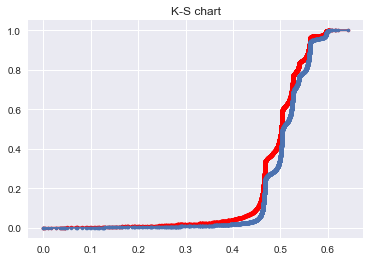

In [69]:
plt.figure(figsize=(6,4))
plt.plot(sortPro['Prob'][:], sortPro['Neg'][:],'.-',color='r')
plt.plot(sortPro['Prob'][:], sortPro['Pos'][:],'.-')
plt.title('K-S chart')
plt.show()

#### ANS: 
#### High robustness: as the proportion of '1' out of total '1' (accumulated default number) and the proportion of '0' out of total '0' (accumulated undefault number) follow the same increasing trend when the probability increase 
#### not very effective, small ks score, proprotion of positive and negative value is not easy to distinguish even at the highest propability.

In [70]:
def RocCurve(df,size=5,color='pink'):
    sortData=df.sort_values(['Prob'])
    sortData['TP']=[sortData.loc[i:,'Y'].sum()/sortData['Y'].sum() for i in sortData.index]
    sortData['FP']=[(sortData.loc[i:,'Y'].shape[0]-sortData.loc[i:,'Y'].sum())/(sortData.shape[0]-sortData['Y'].sum()) for i in sortData.index]
    sortData['Ladder']=0.5*(sortData['TP'].shift(-1)+sortData['TP'])*(sortData['FP']-sortData['FP'].shift(-1))
    AUC=sortData['Ladder'].dropna().sum() 
    plt.figure(figsize=(size,size))
    plt.plot(sortData['FP'][:], sortData['TP'][:],'.-')
    plt.plot([0,1],[0,1],color='red')
    plt.xlabel('False Positive Rate',size=20)
    plt.ylabel('True Positive Rate',size=20)
    plt.title('ROC curve with AUC  '+str(AUC),size=30)
    plt.xlim(0,1)
    plt.ylim(0,1)
    section = np.arange(-1, 1, 1/20.)
    plt.fill_between(sortData['FP'][:], sortData['TP'][:], color=color )
    plt.show()
    return AUC

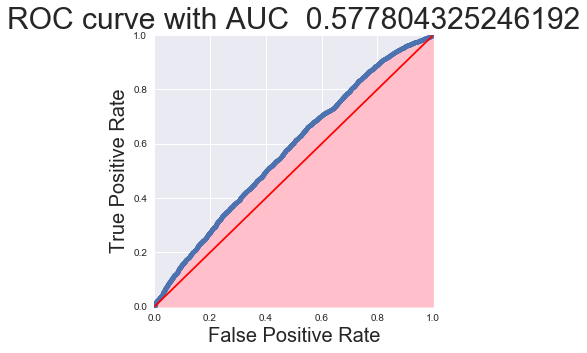

0.577804325246192

In [71]:
RocCurve(sortPro)

#### not High effectiveness: not obvious high true positive rate than false positive rate for different cut off value, which means can seperate  default and undefault group

## Q6
**Please build random forest classification model  using all features prepared in Q1-Q2. Try to find good parameters of model: number of trees and depth of trees based on the standards of ROC curve.   Which model is good, random forest or logistic regression models?**

In [21]:
# define train again, because before might add Prob ... extra columns
train1 = shuffled_data[:cut]
test1 = shuffled_data[cut:]

### two methods for finding the optimal number of trees and depth of trees

In [ ]:
# ##grid search 
# ##brute force search over a range of values
# n_trees = [10,15,20,50]
# depth = [2,5,10,15,20,50]

# #use auc as score
# best_score = 0  
# best_params = {'number of trees': None, 'depth of trees': None}

# for d in depth:
#     for n in n_trees:
#         forest = RandomForestClassifier(criterion='entropy', n_estimators=n, max_depth=d, random_state=0)
#         forest.fit(Train[featurelist],Train['Y'])
#         Train['predicted_prob'] = forest.predict_proba(Train[featurelist])[:,1]
#         score = plot_roc(Train, plot=False)
        
#         if score > best_score:
#             best_score = score 
#             best_params['number of trees'] = n
#             best_params['depth of trees'] = d
            
# print ('best pair of parameters is n = {}, d = {}'.format(best_params['number of trees'], best_params['depth of trees']))

In [ ]:
# ##random search
# ##randomly pick some pairs of hyperparameters over a range of values, less computationally expensive
# #n_trees: from 10 to 50
# #depth: from 2 to 50
# #run for 16 iterations
# itera = 16

# #use auc as score
# best_score = 0  
# best_params = {'number of trees': None, 'depth of trees': None}


# for i in range(itera):
#     forest = RandomForestClassifier(criterion='entropy', n_estimators=np.random.randint(10, 50), max_depth=np.random.randint(2, 50), random_state=0)
#     forest.fit(Train[featurelist],Train['Y'])
#     Train['predicted_prob'] = forest.predict_proba(Train[featurelist])[:,1]
#     score = plot_roc(Train, plot=False)
        
#     if score > best_score:
#         best_score = score 
#         best_params['number of trees'] = n
#         best_params['depth of trees'] = d
            
# print ('best pair of parameters is n = {}, d = {}'.format(best_params['number of trees'], best_params['depth of trees']))

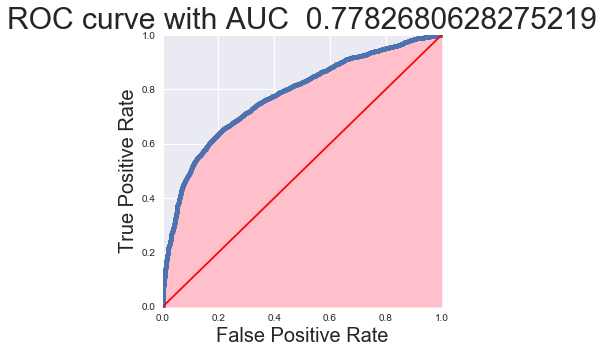

In [72]:
from sklearn.ensemble import RandomForestClassifier
Xtrain=train1.iloc[:,1:]
Ytrain=train1['Y']
forest=RandomForestClassifier(max_depth=4,n_estimators=10, random_state=0).fit(Xtrain,Ytrain)

predictedProb_train=forest.predict_proba(Xtrain)

train1['Prob']=predictedProb_train[:,1]

AUC_train=RocCurve(train1)


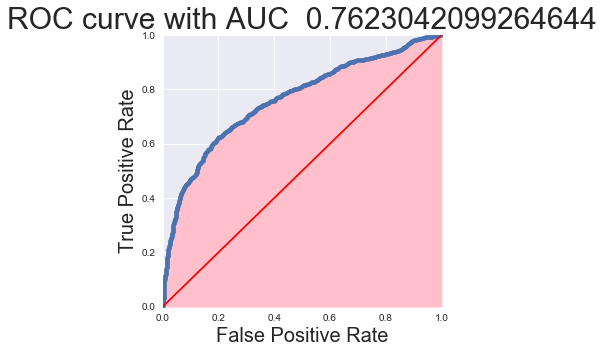

In [73]:
Xtest=test1.iloc[:,1:]
Ytest=test1['Y']
predictedOutcome_test=forest.predict(Xtest)
predictedProb_test=forest.predict_proba(Xtest)
test1['Prob']=predictedProb_test[:,1]
AUC_test=RocCurve(test1)


#### Random forest has higher AUC which means more effective than logistic regression, the depth of tree=4 has the highest AUC for test set, which make the model optimal 